### Examples of solution of kinematics 1D problems

#### Problem

A stone is thrown up in the air with initial velocity $v_1$. The stone is thrown from the height $h$ over the ground.

>a) How long time does it take for the stone to reach its highest point?

>b) How long time does it take for the stone to reach the ground?

>c) What is the velocity at time of impact with the ground?


For each problem we set up one or more symbolic equations in a general form, then substitute specific information in to the equation(s), and then we solve the equation(s). We print out the general solution(s), then select the proper solution (if there are more solutions).

In [1]:
from sympy import symbols,Eq,solve,Rational
print('a)')
t,y1,y2,v1,v2,a,g,h = symbols('t,y_1,y_2,v_1,v_2,a,g,h')
eq = Eq(v2,v1+a*t)
print('Equation:')
display(eq)
print('Equation after substitution:')
eq = eq.subs({a:-g,v2:0})
display(eq)
sol = solve(eq,t)
print('Solution:')
display(sol)
print('Final solution:')
display(sol[0])

a)
Equation:


Eq(v_2, a*t + v_1)

Equation after substitution:


Eq(0, -g*t + v_1)

Solution:


[v_1/g]

Final solution:


v_1/g

In [2]:
from sympy import symbols,Eq,solve,Rational
print('b)')
t,y1,y2,v1,v2,a,g,h = symbols('t,y_1,y_2,v_1,v_2,a,g,h')
eq = Eq(y2,y1+v1*t+Rational(1,2)*a*t**2)
print('Equation:')
display(eq)
print('Equation after substitution:')
eq = eq.subs({a:-g,y1:h,y2:0})
display(eq)
sol = solve(eq,t)
print('Solution:')
display(sol)
print('Final solution:')
display(sol[1])
t_impact = sol[1]

b)
Equation:


Eq(y_2, a*t**2/2 + t*v_1 + y_1)

Equation after substitution:


Eq(0, -g*t**2/2 + h + t*v_1)

Solution:


[(v_1 - sqrt(2*g*h + v_1**2))/g, (v_1 + sqrt(2*g*h + v_1**2))/g]

Final solution:


(v_1 + sqrt(2*g*h + v_1**2))/g

In [3]:
from sympy import symbols,Eq,solve,Rational
print('c)')
t,y1,y2,v1,v2,a,g,h = symbols('t,y_1,y_2,v_1,v_2,a,g,h')
eq1 = Eq(y2,y1+v1*t+Rational(1,2)*a*t**2)
eq2 = Eq(v2,v1+a*t)
print('Equations:')
display(eq1)
display(eq2)
print('Equation after substitution:')
eq1 = eq1.subs({a:-g,y1:h,y2:0})
eq2 = eq2.subs({a:-g,y1:h,y2:0})
display(eq1)
display(eq2)
sol = solve([eq1,eq2],[t,v2])
print('Solution:')
display(sol)
print('Final solution:')
print('Time to impact')
display(sol[1][0])
print('Velocity at impact')
display(sol[1][1])

c)
Equations:


Eq(y_2, a*t**2/2 + t*v_1 + y_1)

Eq(v_2, a*t + v_1)

Equation after substitution:


Eq(0, -g*t**2/2 + h + t*v_1)

Eq(v_2, -g*t + v_1)

Solution:


[((v_1 - sqrt(2*g*h + v_1**2))/g, sqrt(2*g*h + v_1**2)),
 ((v_1 + sqrt(2*g*h + v_1**2))/g, -sqrt(2*g*h + v_1**2))]

Final solution:
Time to impact


(v_1 + sqrt(2*g*h + v_1**2))/g

Velocity at impact


-sqrt(2*g*h + v_1**2)

#### Problem

A cyclist travels with the velocity as shown in the figure below.

>a) How far does the cyclist travel in the time interval?

>b) How far does the cyclist travel in the time interval from 13 s to 52 s?

>c) What is the average velocity of the cyclist in the time interval from 0 s to 25 s?

Note the way in which the velocity is calculated. Since it is a piecewise defined function we use *if*s in the definition of *f(t)*. 
We then use list comprehension to compute the velocity for each time in the time vector *t*.
List comprehension uses *[v(T) for T in t if True]*, it goes through all values in *t* and if *True* (always, true) it adds *v(T)* to the list.
The function *f(t)* cannot be called with a vector argument (try it).

The problem can be solved by computing the area under the curve, we do it numerically, but you can also do it manually.
Here we employ the method *quad* from *scipy.integrate*. This method return the value of the integral and the estimated uncertainty.
In our case we have a function that can be evaluated at all points. If we only had data (x,y) to integrate over the method *trapezoid* can be used, we show how to use it in a).

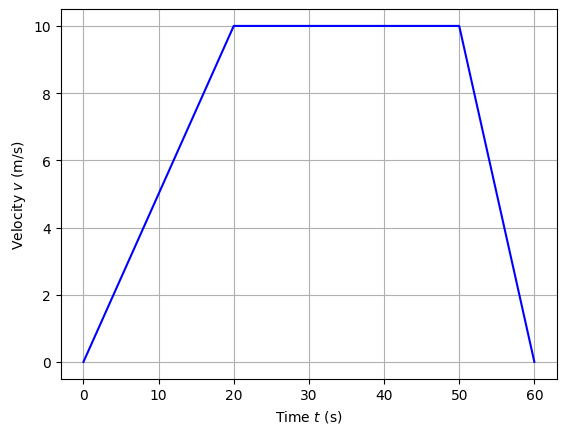

In [5]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0,60,1000)
def f(t):
    if t < 20:
        return 0.5 * t
    elif t < 50:
        return 10.0
    else:
        return 10.0 - 1.0 * (t-50.0)
v = [f(T) for T in t if True]
plt.figure()
plt.plot(t,v,'b-')
plt.xlabel('Time $t$ (s)')
plt.ylabel('Velocity $v$ (m/s)')
plt.grid()
plt.show()

In [6]:
from scipy.integrate import quad,trapezoid
print('a) - uses integration with function')
distance,uncertainty = quad(f,0.0,60.0)
print(distance)
print(uncertainty)
print('   - uses integration with data')
distance = trapezoid(v,t)
print(distance)

a) - uses integration with function
450.0
4.996003610813204e-13
   - uses integration with data
449.99954909864823


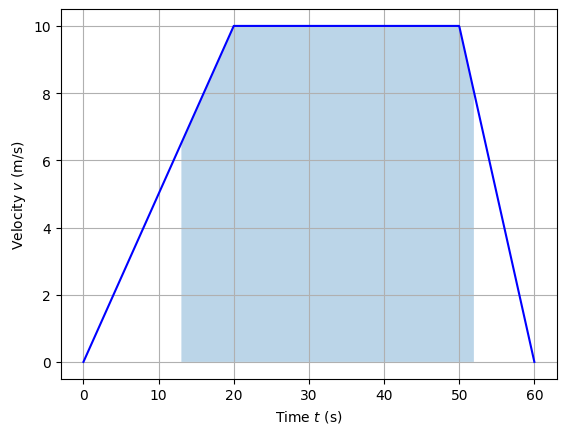

In [7]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0,60,1000)
def f(t):
    if t < 20:
        return 0.5 * t
    elif t < 50:
        return 10.0
    else:
        return 10.0 - 1.0 * (t-50.0)
v = np.array([f(T) for T in t if True])
x = np.array([T for T in t if T>=13 and T<=52]) # select the times in the interval [13,52]
y = np.array([f(T) for T in t if T>=13 and T<=52]) # select the function values for the times in the interval [13,52]
plt.figure()
plt.plot(t,v,'b-')
plt.fill_between(x,0,y,alpha=0.3)
plt.xlabel('Time $t$ (s)')
plt.ylabel('Velocity $v$ (m/s)')
plt.grid()
plt.show()

In [8]:
print('b)')
distance,uncertainty = quad(f,13.0,52.0)
print(distance)
print(uncertainty)

b)
375.74999999039994
1.4357277387263215e-06


In [9]:
print('c)')
distance,uncertainty = quad(f,0.0,25.0)
print(distance/25.0)

c)
5.999999999999999


#### Problem

A train travls with the speed $20$ m/s and is at time $t=0$ at $x=0$ m. 
Another train is at time $t=0$ at $x=100$ m. 
The secon train travels with velocity $-20$ m/s. 
The two train are on course for a collision, and the train driver of the second train
start breaking with an acceleration of $0.5 \text{m/s}^2$.

>a) Determine the time at which the trains collide (if they do)? Comment on the solution(s).

>b) Graph the positions of the trains as a function of time for $t\in[0 s,200 s]$?

>c) What happens if the acceleration is $2.5 \text{m/s}^2$?

In [9]:
from sympy import symbols,Eq,solve,Rational
print('a)')
x10,v1,x20,v2,a2,t = symbols('x10,v1,x20,v2,a2,t')
x1 = x10 + v1 * t
x2 = x20 + v2 * t + Rational(1,2) * a2 * t**2
eq = Eq(x1,x2)
print('Equation:')
display(eq)
eq = eq.subs({x10:0,x20:400,v1:20,v2:-20,a2:0.5})
print('Equation after substitution:')
display(eq)
print('Solution:')
sol = solve(eq,t)
display(sol)
print('Final solution:')
display(sol[0])
print('The first solution is an impact, the second solution is like the second train passed through the second train and impacted a second time.')

a)
Equation:


Eq(t*v1 + x10, a2*t**2/2 + t*v2 + x20)

Equation after substitution:


Eq(20*t, 0.25*t**2 - 20*t + 400)

Solution:


[10.7179676972449, 149.282032302755]

Final solution:


10.7179676972449

The first solution is an impact, the second solution is like the second train passed through the second train and impacted a second time.


b)


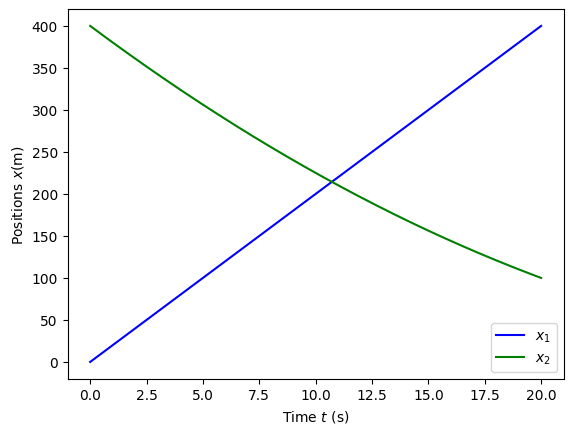

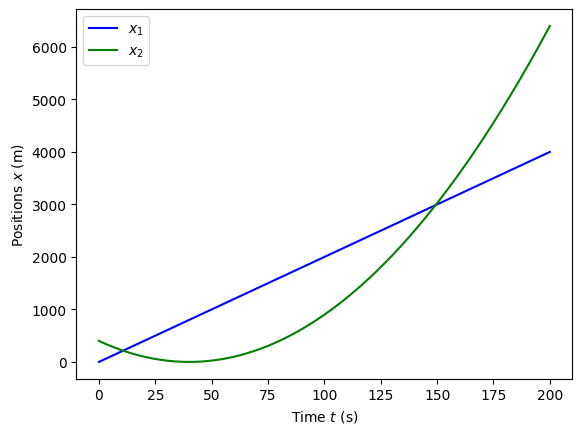

In [10]:
print('b)')
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
t = np.linspace(0,20,1000)
x1 = 20*t
x2 = 400 -20*t+0.5*0.5*t**2
plt.plot(t,x1,'b-',label='$x_1$')
plt.plot(t,x2,'g-',label='$x_2$')
plt.xlabel('Time $t$ (s)')
plt.ylabel('Positions $x$(m)')
plt.legend()
plt.show()
t = np.linspace(0,200,1000)
x1 = 20*t
x2 = 400 -20*t+0.5*0.5*t**2
x1 = 20*t
x2 = 400 -20*t+0.5*0.5*t**2
plt.plot(t,x1,'b-',label='$x_1$')
plt.plot(t,x2,'g-',label='$x_2$')
plt.xlabel('Time $t$ (s)')
plt.ylabel('Positions $x$ (m)')
plt.legend()
plt.show()

In [11]:
print('c)')
from sympy import symbols,Eq,solve,Rational
x10,v1,x20,v2,a2,t = symbols('x10,v1,x20,v2,a2,t')
x1 = x10 + v1 * t
x2 = x20 + v2 * t + Rational(1,2) * a2 * t**2
eq = Eq(x1,x2)
print('Equation:')
display(eq)
eq = eq.subs({x10:0,x20:400,v1:20,v2:-20,a2:2.5})
print('Equation after substitution:')
display(eq)
sol = solve(eq,t)
print('Solution:')
display(sol)
print('There are no real solutions, hence no impact.')

c)
Equation:


Eq(t*v1 + x10, a2*t**2/2 + t*v2 + x20)

Equation after substitution:


Eq(20*t, 1.25*t**2 - 20*t + 400)

Solution:


[16.0 - 8.0*I, 16.0 + 8.0*I]

There are no real solutions, hence no impact.


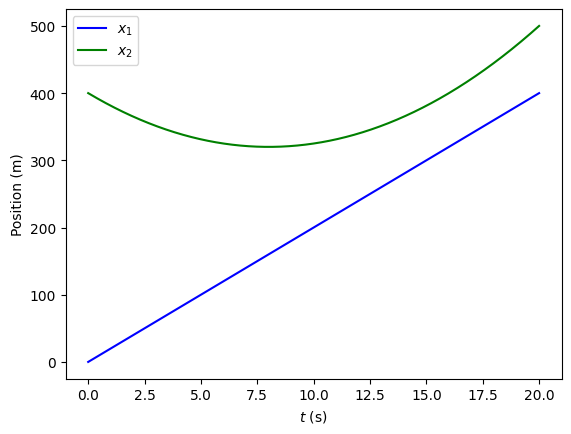

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
t = np.linspace(0,20,1000)
x1 = 20*t
x2 = 400 -20*t+0.5*2.5*t**2
plt.plot(t,x1,'b-',label='$x_1$')
plt.plot(t,x2,'g-',label='$x_2$')
plt.xlabel('$t$ (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()